# Libraries

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as mtick
from scipy.stats import f_oneway

# Data Understanding

In [170]:
train_data = pd.read_csv('train.csv')
train_data.head(3)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900


Text(0.5, 1.0, 'price >200K box plot')

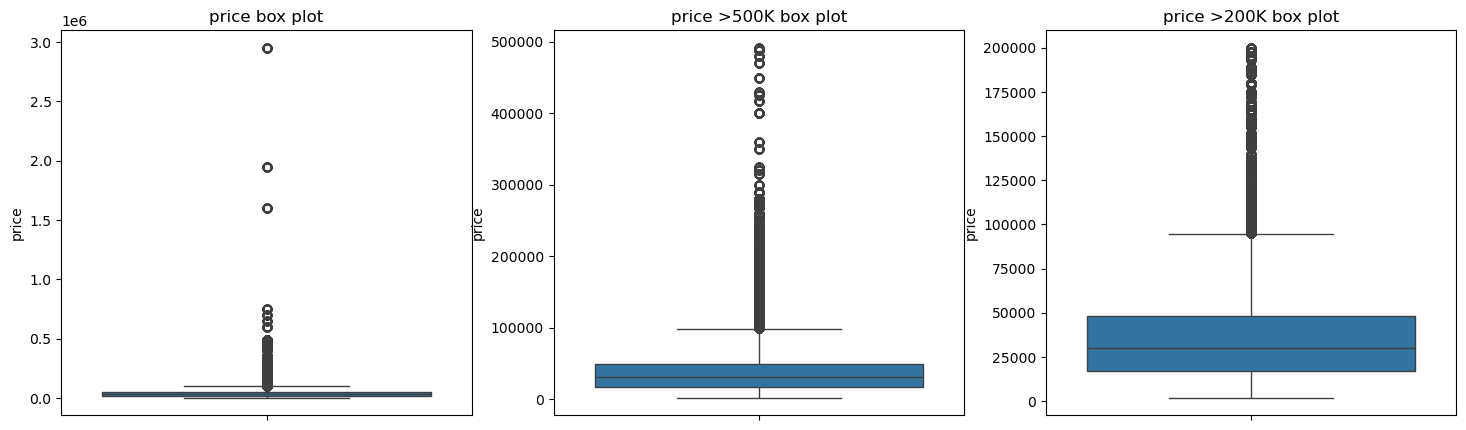

In [171]:
fig,axes = plt.subplots(1,3,figsize=(18,5))

sns.boxplot(train_data['price'],ax=axes[0])
axes[0].set_title("price box plot")

sns.boxplot(train_data[train_data['price']<500000]['price'],ax=axes[1])
axes[1].set_title("price >500K box plot")

sns.boxplot(train_data[train_data['price']<200000]['price'],ax=axes[2])
axes[2].set_title("price >200K box plot")

We see that a bulk of cars are sold in the range 20K to 70K, till 100K, and cars sold over 100K seems, less, however we still need a quantitative analysis of what is the percentage distribution.

In [172]:
price_stat_dict = {}
for value in train_data['price'].describe(percentiles=[.25, .50, .75, .85, .90]).reset_index()[['index','price']].values:
    if value[0] == 'count' or value[0] == 'std' or value[0] == 'min':
        continue
    price_stat_dict[value[0]] = value[1]
price_stat_dict

{'mean': 43878.01617753921,
 '25%': 17000.0,
 '50%': 30825.0,
 '75%': 49900.0,
 '85%': 65700.0,
 '90%': 78500.0,
 'max': 2954083.0}

In [173]:
stat_df = pd.DataFrame()
idx = 0
for keys,val in price_stat_dict.items():
    stat_df.loc[idx,'idx'] = keys
    stat_df.loc[idx,'count_less_than'] = (train_data['price']<val).sum()
    stat_df.loc[idx,'percentage'] = (train_data['price']<val).sum()/(train_data['price']<price_stat_dict['max']).sum()
    idx+=1
stat_df = stat_df.sort_values(by='count_less_than',ascending=False)
stat_df


,idx,count_less_than,percentage
6,max,188483.0,1.000000
5,90%,169641.0,0.900033
4,85%,160197.0,0.849928
3,75%,141339.0,0.749877
0,mean,129312.0,0.686067
2,50%,94257.0,0.500082
1,25%,46816.0,0.248383


Text(0.5, 1.0, 'price box plot')

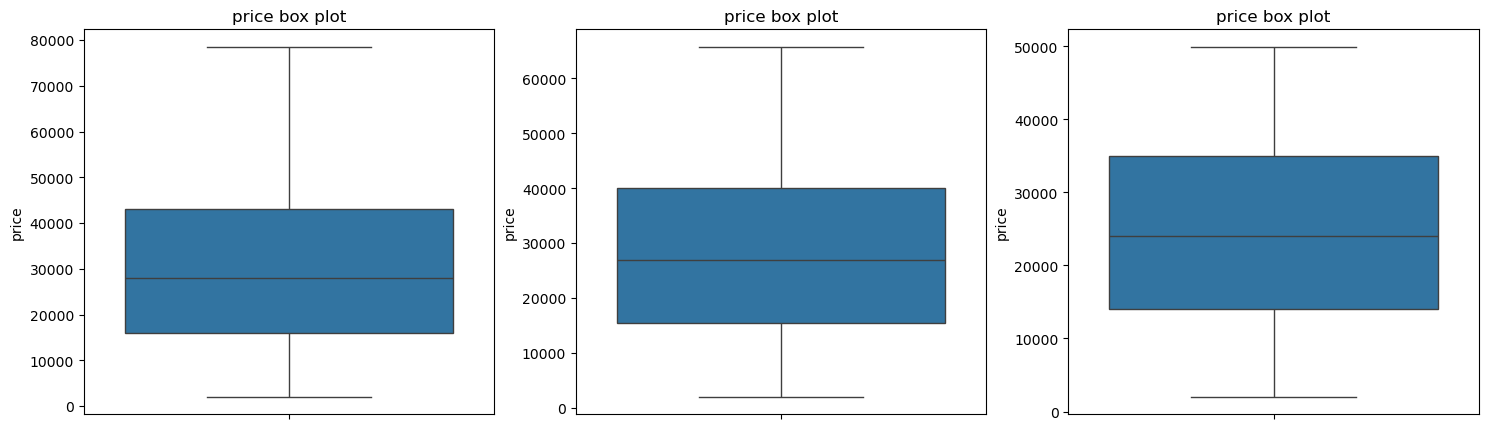

In [174]:
fig,axes = plt.subplots(1,3,figsize=(18,5))

sns.boxplot(train_data[train_data['price']<price_stat_dict['90%']]['price'],ax=axes[0])
axes[0].set_title("price box plot")

sns.boxplot(train_data[train_data['price']<price_stat_dict['85%']]['price'],ax=axes[1])
axes[1].set_title("price box plot")

sns.boxplot(train_data[train_data['price']<price_stat_dict['75%']]['price'],ax=axes[2])
axes[2].set_title("price box plot")

In [226]:

def categorical_box_plots_wrt_price(col_name):
    # Function to format large numbers with "K"
    def format_thousands(x, pos):
        if x >= 1000:
            return f'{int(x / 1000)}K'
        return f'{int(x)}'


    distinct_values = train_data[col_name].unique().tolist()

    fig, axes = plt.subplots(int(len(distinct_values) / 3) + 1, 3, figsize=(12, 30))

    i=0
    for row in range(0, int(len(distinct_values) / 3) + 1):
        for col in range(0,3):
            if i < len(distinct_values):
                filtered_data = train_data[train_data[col_name] == distinct_values[i]]
                sns.boxplot(x=filtered_data['price'], ax=axes[row, col])
                axes[row,col].set_title(distinct_values[i])
                axes[row, col].xaxis.set_major_formatter(mtick.FuncFormatter(format_thousands))
                i+=1

    plt.savefig(f'{col_name}.jpg', format='jpg')
    plt.tight_layout()
    plt.show()


In [227]:
train_data['brand'].value_counts(ascending=False,normalize=True)[:10]*100

brand
Ford             12.246132
Mercedes-Benz    10.169042
BMW               9.031841
Chevrolet         8.664266
Audi              5.774586
Porsche           5.628723
Land              5.052166
Toyota            4.694138
Lexus             4.584343
Jeep              3.433882
Name: proportion, dtype: float64

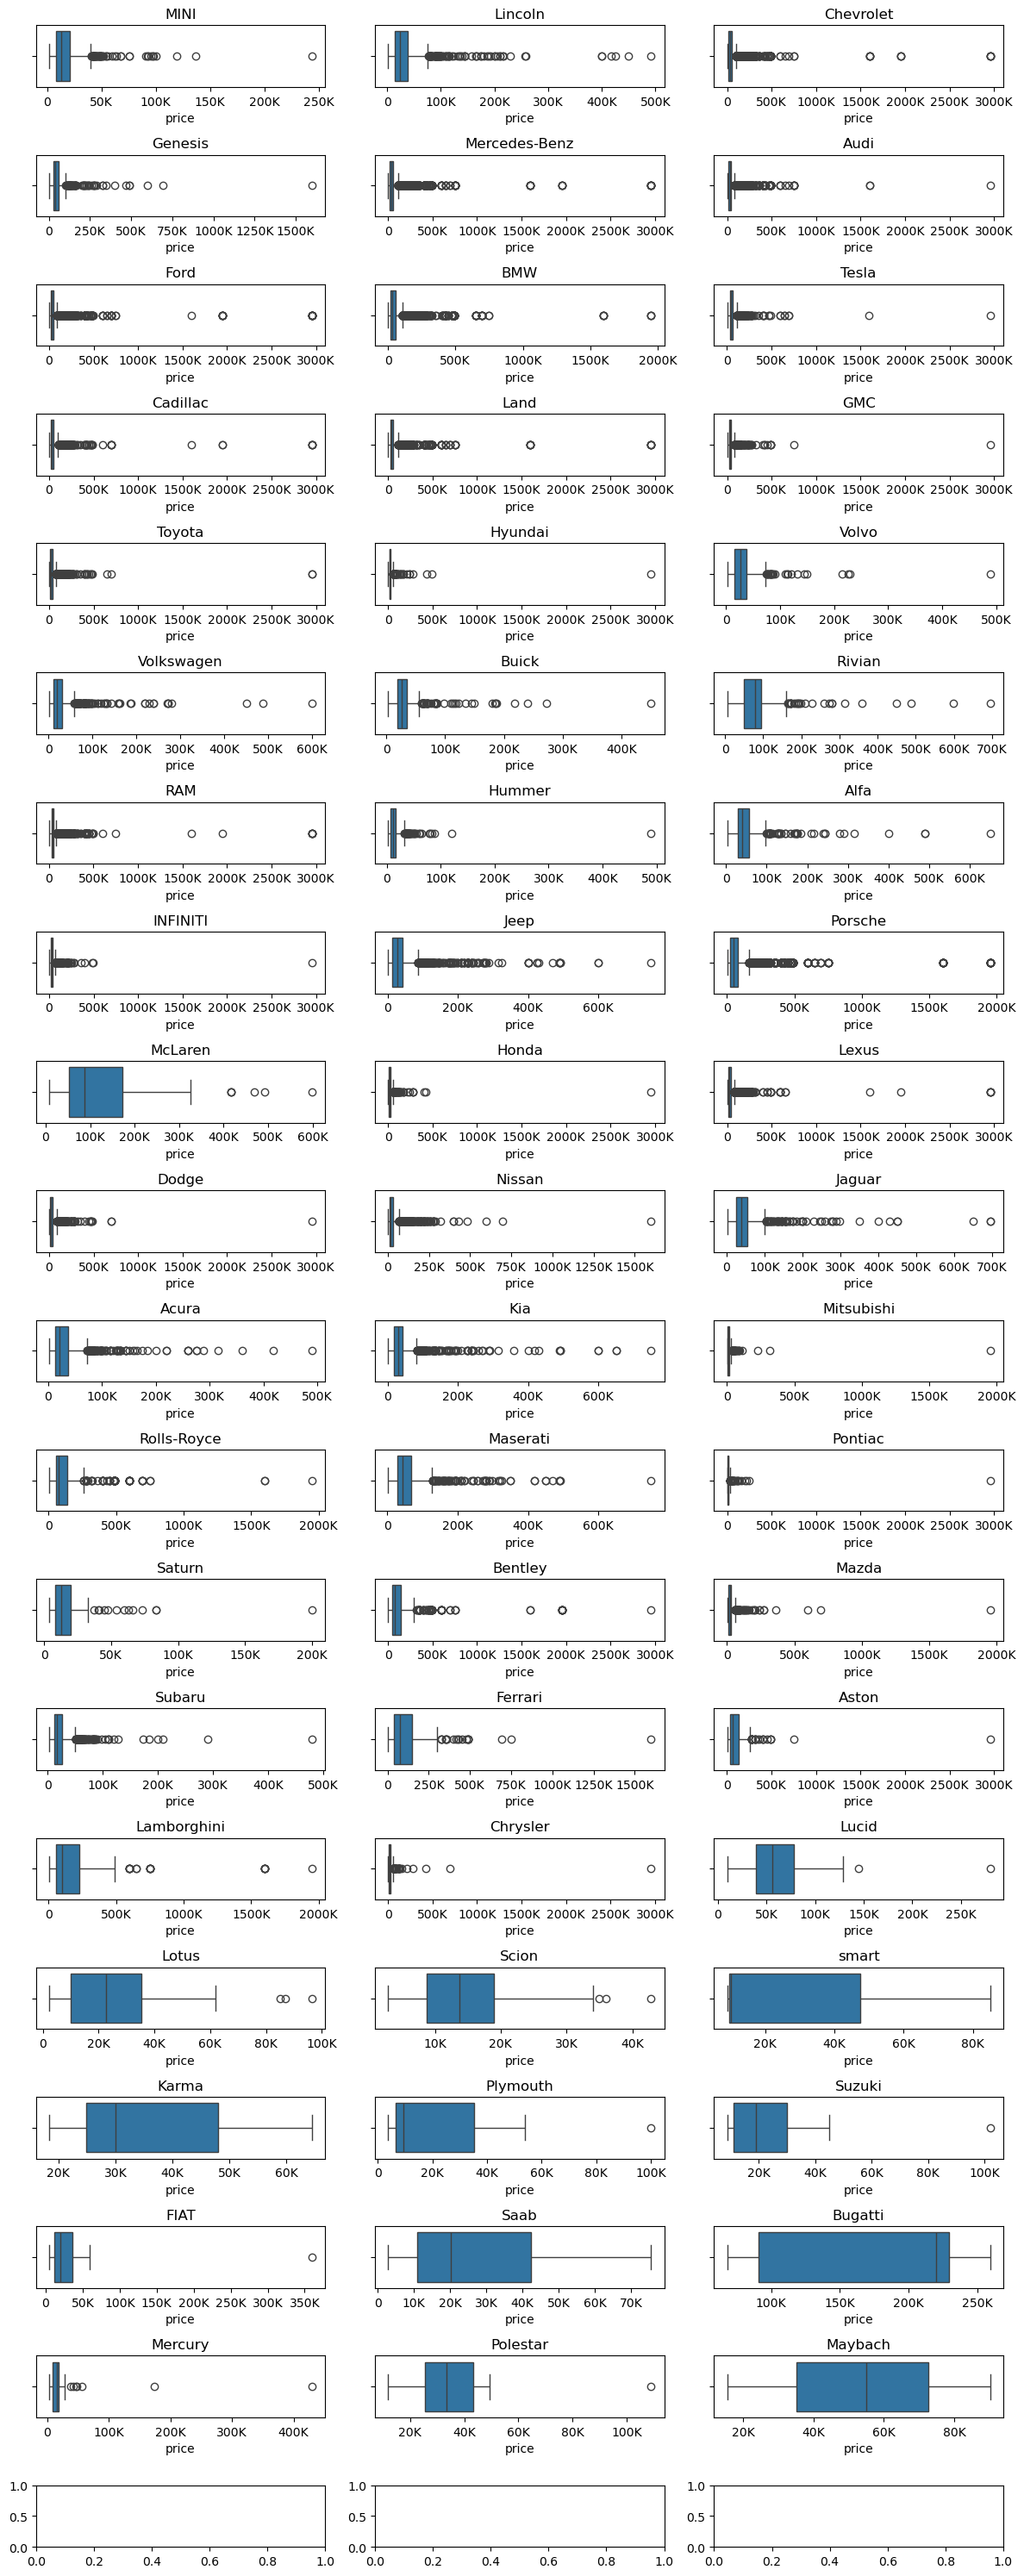

In [228]:
categorical_box_plots_wrt_price('brand')

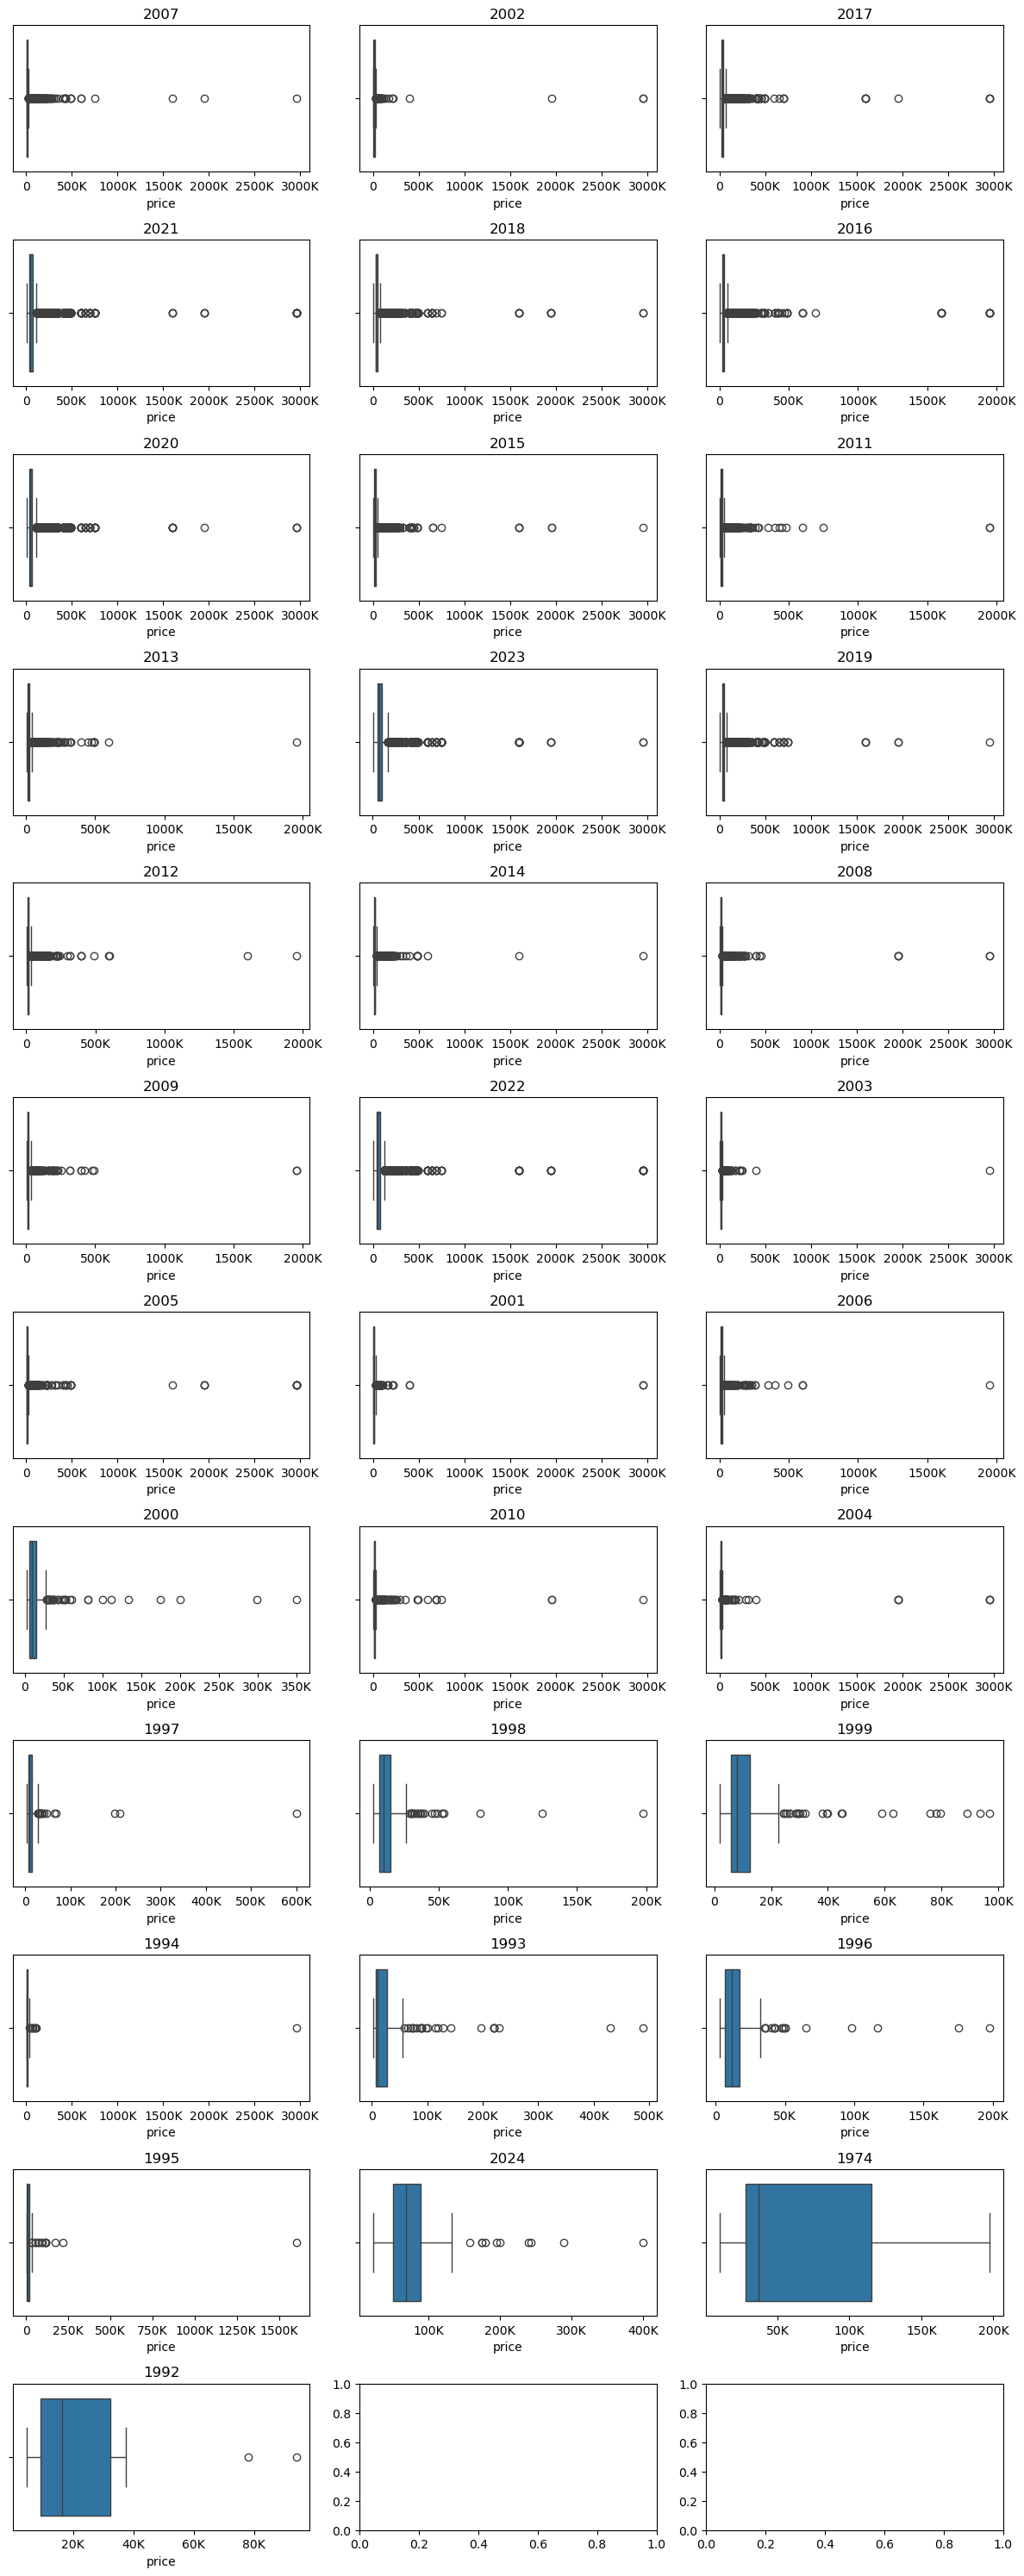

In [229]:
categorical_box_plots_wrt_price('model_year')

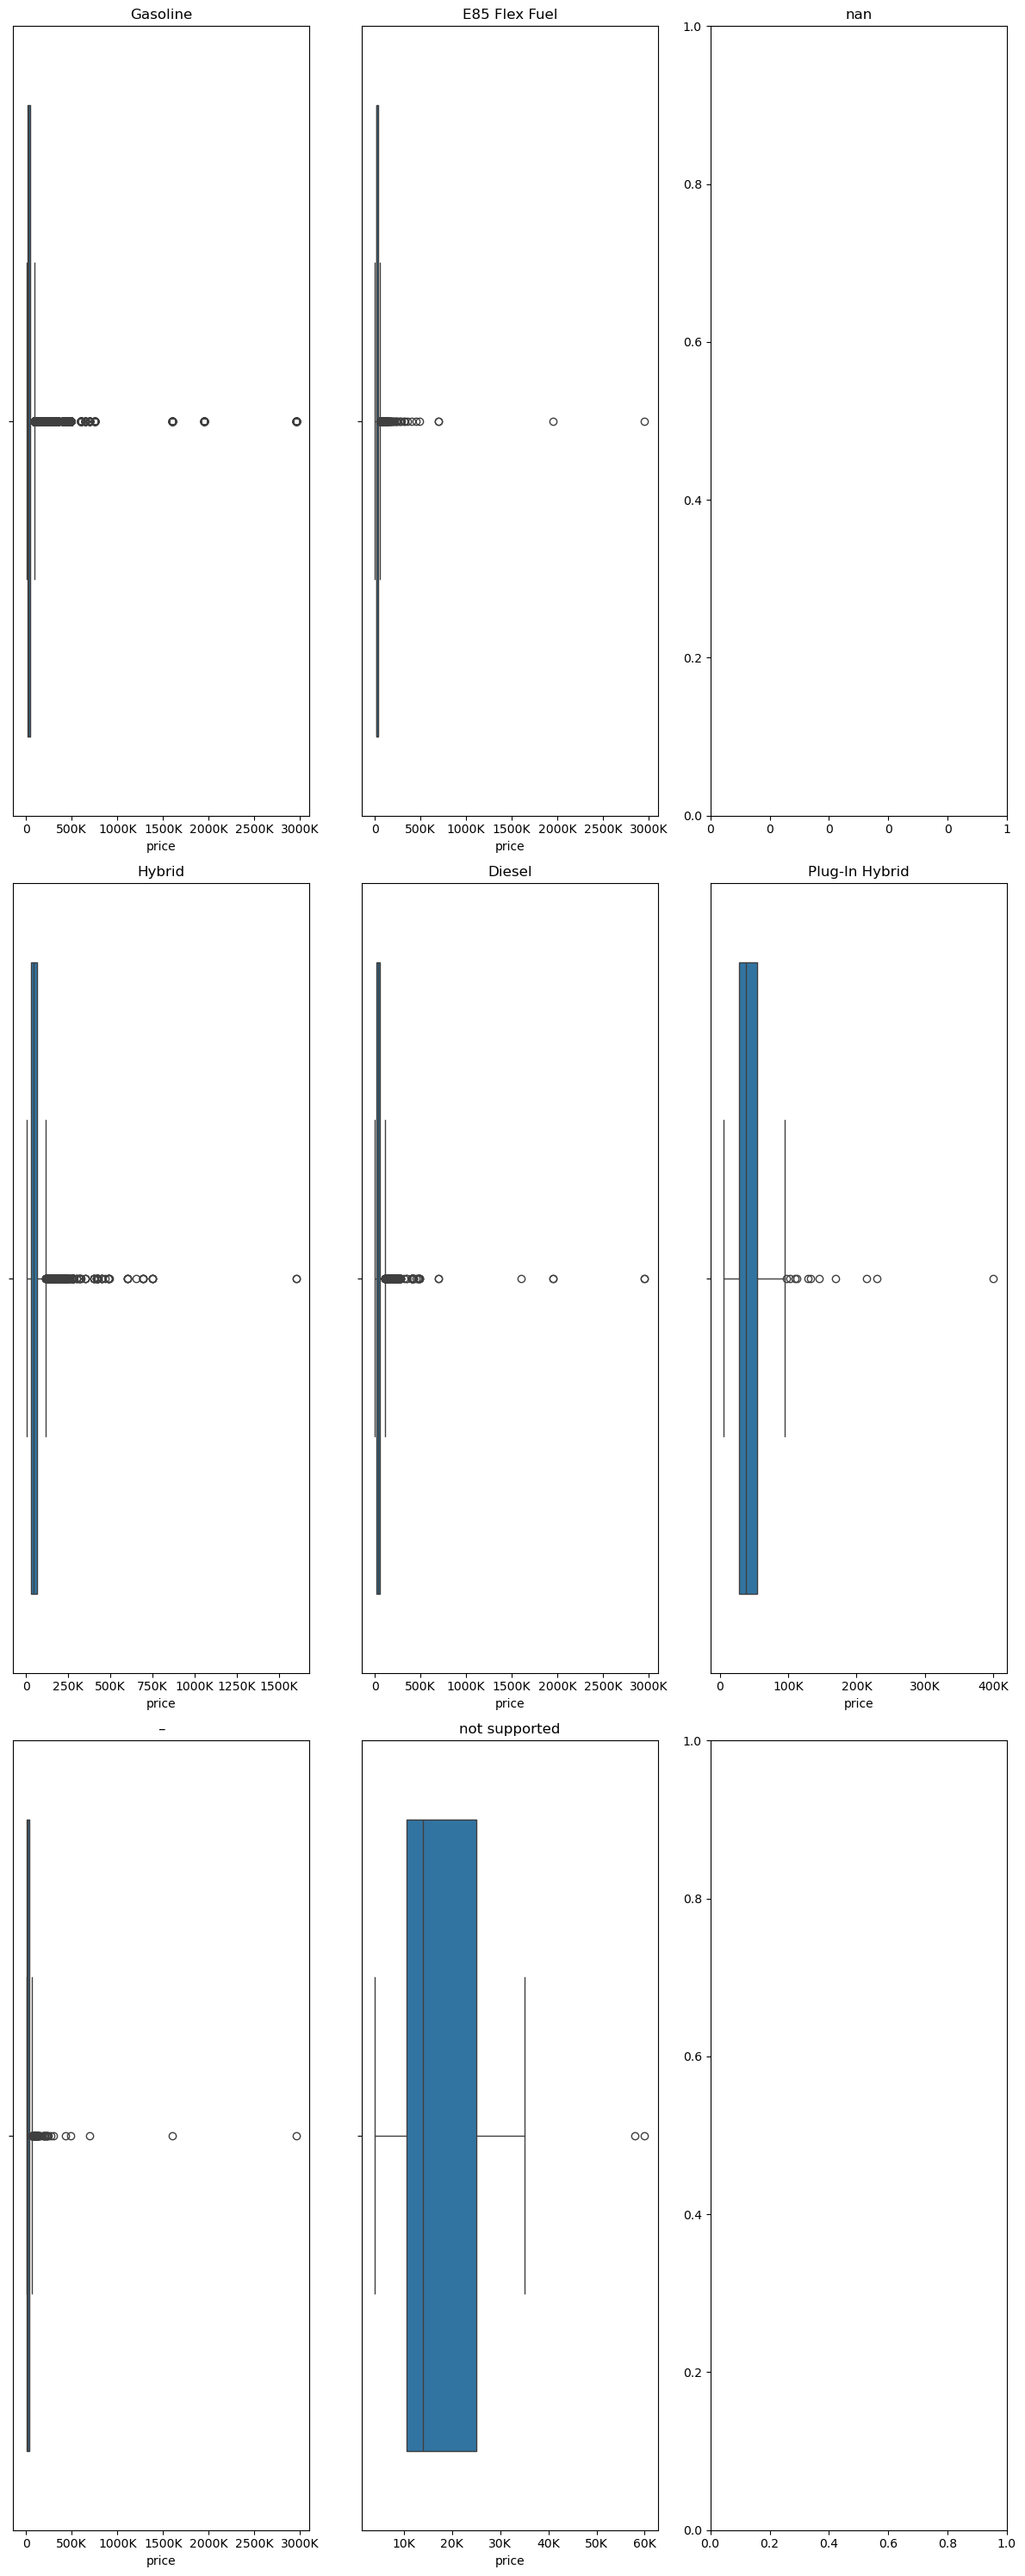

In [230]:
categorical_box_plots_wrt_price('fuel_type')

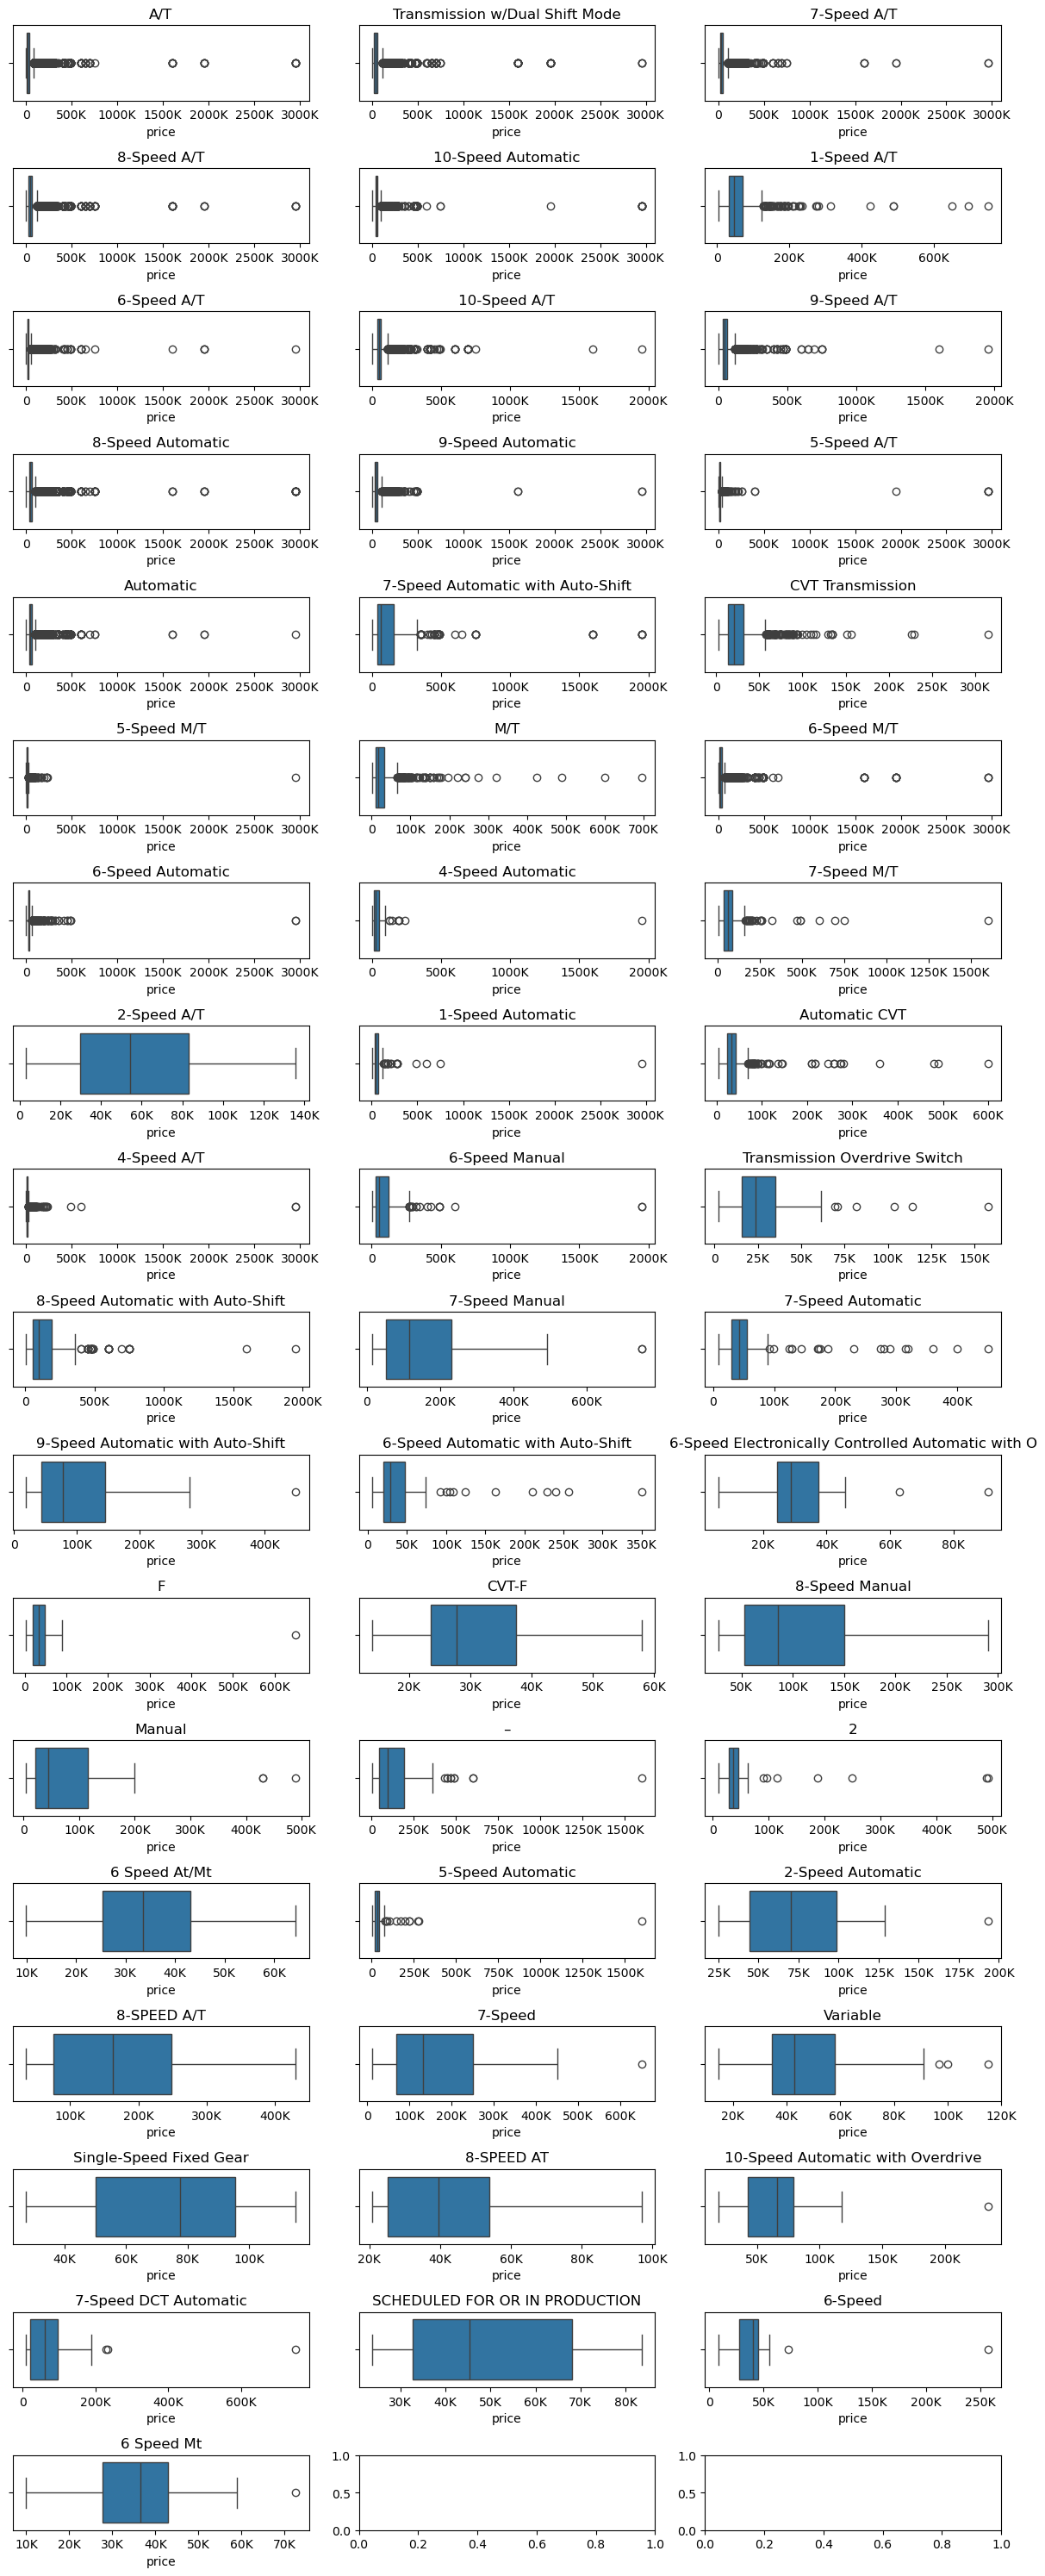

In [231]:
categorical_box_plots_wrt_price('transmission')

<Axes: xlabel='accident', ylabel='price'>

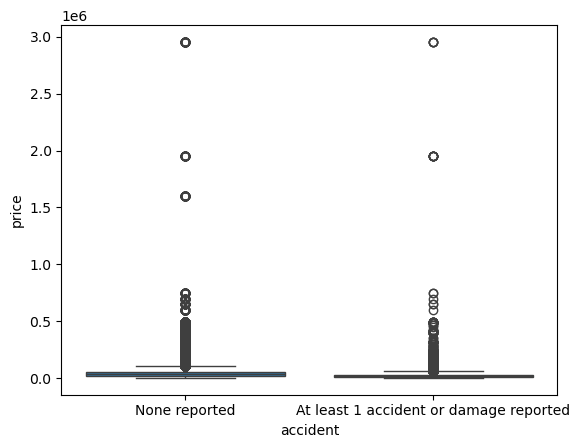

In [237]:
sns.boxplot(x='accident',y='price',data=train_data)